## 此文件用于分析连接中的密码

**outline**

- 高频出现的弱密码及出处
- 纯数字的模式 
- 特定的键盘输入模式
    - 例如：！、1、修改一个字母

- 设计若干可以归一化的指标，

### 密码分类

```
  22253 123456
   6952 123
   3950 1234
   2957 admin
   2927 12345
   2803 root
   2435 test
   2170 password
   2042 12345678
   2016 1
   1861 toor
   1567 qwerty
   1541 guest
   1446 ubuntu
   1153 111111
   1004 J5cmmu=Kyf0-br8CsW
    878 5nWt3P-fF4WosQm5O
    836 1qaz@WSX
    780 123456789
    711 0
    696 123123
    633 admin123
    626 P@ssw0rd
    594 1qq2w3e4r5t
    588 1234567890
    564 user
    564 123qwe!@#
    503 oracle
    454 abc123
    437 Aa123456
```

在此截取了连接记录中出现次数前 30 的密码，这些密码可以被分为如下几类：

1. 纯数字组合，例如 123456、123、1234、12345、12345678、1、111111、123456789、0、123123、1234567890；
2. 有特定含义的英文单词，例如 admin、root、test、password、guest、ubuntu、user、oracle；
3. 键盘上的特定模式，例如 qwerty、1qaz@WSX、123qwe!@#、1qq2w3e4r5t;
4. 简单英文和数字的组合，例如 admin123、abc123、Aa123456；
5. 对原有常见密码的简单变形，例如 toor、P@ssw0rd；
6. 没有直接意义但是位居前列的 J5cmmu=Kyf0-br8CsW 和 5nWt3P-fF4WosQm5O。

除了高频出现的上述类型密码外，出现次数没有特别多的密码还出现了这些类型：
// TODO 新增的密码 
1. 

// TODO 


### 单个密码出现分布

`123456` 这个密码在记录中出现了 22253 次，占全部记录的 6.22%，接下来我们将展现这个密码的出现规律。

1. 该密码的每日出现次数；
2. 该密码的出现次数占据每日请求次数的比例；

提取数据的脚本：

```shell
$ awk '{if ($6 == "123456") print $1 }' fakessh-filter-empty-password.log | sort | uniq -c >
> extracted/ch2-123456-day-count.log
```

In [2]:
# Common functions

def load_data (filename):
    data = []
    text = []
    with open(filename, encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            t = line.strip().split(" ")
            if len(t) >= 2:
                key, value = int(t[0]), t[1]
                data.append(key)
                text.append(value)
    return data, text

data, text = load_data("dataset/extracted/password-count.log")

print(data[:10])
print(text[:10])

def format_num(n):
    if n >= 10000:
        return f"{n/10000:.1f}w"
    return str(n)

def format_str(s):
    if len(s) > 10:
        return s[:7]+"..."
    return s

[22253, 6952, 3950, 2957, 2927, 2803, 2435, 2170, 2042, 2016]
['123456', '123', '1234', 'admin', '12345', 'root', 'test', 'password', '12345678', '1']


[991, 1461, 1743, 1779, 840, 631, 724, 637, 473, 864, 683, 353, 353, 379, 313, 615, 639, 510, 341, 609, 428, 676, 612, 536, 940, 589, 135, 87, 41, 64, 48, 35, 17, 32, 27, 12, 41, 50, 22, 42, 15, 0, 5, 9, 10, 0, 7, 239, 77, 429, 213, 144, 271, 861, 344, 257]
[0.16644272757809875, 0.13802550779404818, 0.30387029288702927, 0.15464186369958274, 0.08309427243050747, 0.07714879569629539, 0.09870483980913429, 0.07977457733249843, 0.0513795350858136, 0.039315617036767385, 0.023281180761495723, 0.05819320804484009, 0.052655131264916465, 0.05076346102330565, 0.06407369498464688, 0.044079701834862386, 0.06103734836183017, 0.06926524514464213, 0.05910903102790778, 0.07008861779261134, 0.08634254589469437, 0.07550541717859935, 0.03840843479352329, 0.07179212429681221, 0.14392895421834329, 0.08707865168539326, 0.0598404255319149, 0.01563623292595255, 0.006320332973639587, 0.02512760109933255, 0.023054755043227664, 0.0425273390036452, 0.026813880126182965, 0.028419182948490232, 0.027466937945066123, 

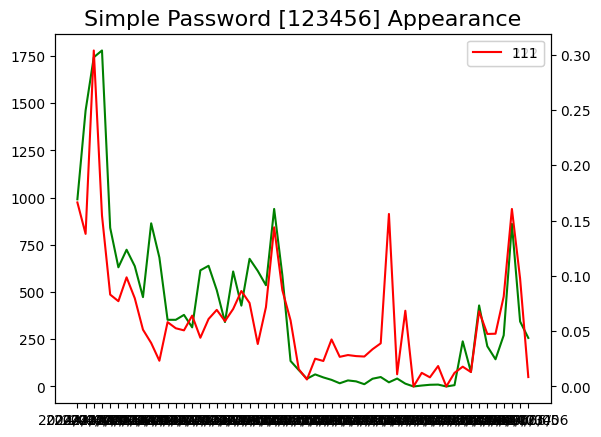

In [3]:
## this is implement for plot simple password [123456] count plot
import matplotlib.pyplot as plt

def plot_simple_password_appear():
    
    data_count, text_count = load_data("dataset/extracted/ch2-123456-day-count.log")
    count_map = {}
    for i in range(len(text_count)):
        count_map[text_count[i]] = data_count[i]

    data_total, text_total = load_data("dataset/extracted/day-count.log")

    y1 = [0 for _ in range(len(text_total))] # appearance count
    y2 = [0 for _ in range(len(text_total))] # appear proportion
    for i in range(len(text_total)):
        date = text_total[i]
        appear = 0
        if date in count_map:
            appear = count_map[date]
        y1[i] = appear
        y2[i] = appear/data_total[i]

    print(y1)
    print(y2)
    x = text_total

    ax1 = plt.gca()
    ax1.plot(x, y1, label='222', c='g')

    plt.title("Simple Password [123456] Appearance", fontsize=16)

    ax2 = plt.twinx()
    ax2.plot(x, y2, c='r', label='111')

    # plt.ylim(2, 5)
    # plt.tick_params(bottom=True, top=False, left=False, right=False)
    # plt.grid(True, axis='y')
    # yticks = [2.0, 3.0, 4.0, 5.0]
    # plt.yticks(yticks, tuple([int(10 ** i) for i in yticks]))
    # plt.xticks([])

    # plt.legend(loc=0)
    ax1.legend(loc=0)
    ax2.legend(loc=1)
    
plot_simple_password_appear()
plt.show()

图标的趋势与预估相差甚远，因为预想中“123456”这个密码是平均分布在连接记录中的，那么其比例就应该维持在一个波动不大的范围内；但实际上其在每天的连接中出现比例的变化趋势与其出现次数大致相似，需要进一步寻找其原因。

可能的猜想包括：
1. 123456 这个密码被特定的客户端（在这里可以认为是 IP）高频使用，那么其出现的频率与应该特定 IP 有明显相关性；
2. 进行扫描的客户端存在一定的周期，目前观测的时间范围还不能明显体现出来；

不妨我们对上述猜想进行验证。

```shell

ips = (125.71.177.165 111.67.197.25 103.252.4.139 177.250.25.13 88.218.93.92 68.183.48.199 111.231.16.76 223.100.28.112 154.61.76.78 112.192.20.23 164.215.103.234 185.217.1.246 183.81.169.238 122.224.37.86 183.213.92.170 1.192.188.70 36.110.228.254 36.140.104.38 60.255.228.65 117.80.237.70 27.116.53.234 112.192.20.22 47.116.11.110 182.72.90.18 206.189.149.40 183.239.27.18 42.5.104.44 14.29.206.196 179.43.180.108 104.248.153.120)

for element in ${array[@]}
#也可以写成for element in ${array[*]}
do
echo $element
done

```

[['1.116.136.219', 1, 30], ['101.32.241.188', 1, 30], ['101.33.245.75', 1, 30], ['101.34.44.3', 1, 30], ['101.34.52.245', 1, 30], ['101.34.61.37', 1, 30], ['101.35.23.118', 1, 30], ['101.42.19.4', 1, 30], ['101.43.161.207', 1, 30], ['103.10.44.105', 1, 30], ['103.101.178.109', 1, 1], ['103.130.218.31', 1, 30], ['103.146.50.194', 1, 30], ['103.157.115.106', 1, 2], ['103.159.56.5', 1, 1], ['103.171.1.37', 1, 30], ['103.183.113.211', 1, 30], ['103.46.224.235', 1, 1], ['103.55.49.10', 1, 30], ['103.66.49.166', 1, 30], ['103.77.247.254', 1, 30], ['103.97.177.91', 1, 1], ['104.248.228.79', 1, 30], ['104.250.49.218', 1, 10], ['104.250.50.140', 1, 15], ['104.28.195.105', 1, 1], ['104.28.227.106', 1, 10], ['106.13.9.186', 1, 30], ['106.51.105.25', 1, 30], ['106.51.172.211', 1, 30], ['106.52.3.234', 1, 30], ['106.54.217.227', 1, 30], ['106.75.222.175', 1, 5], ['107.172.81.110', 1, 30], ['107.175.193.175', 1, 30], ['109.196.174.20', 1, 30], ['110.42.254.19', 1, 30], ['111.21.99.227', 1, 30], ['11

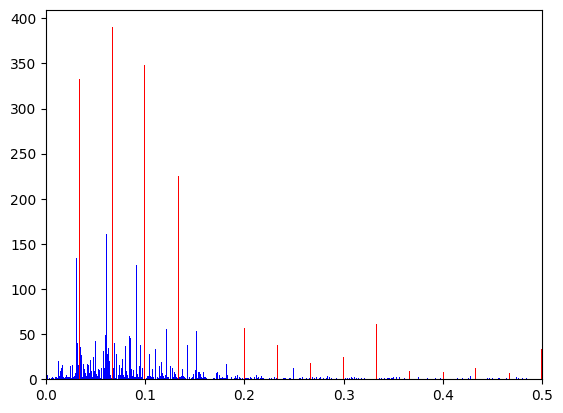

In [42]:
## this is implement for plot simple password [123456] count plot
import matplotlib.pyplot as plt

def plot_appear_per_ip_hist():
    
    data_count, text_count = load_data("dataset/extracted/ip-count.log")
    ip_map = {}
    for i in range(len(text_count)):
        ip_map[text_count[i]] = data_count[i]

    data_specific, text_specific = load_data("dataset/extracted/ch2/123456-ip-count.log")

    y1 = [0 for _ in range(len(text_specific))] # appearance count
    y2 = [0 for _ in range(len(text_specific))] # appear proportion
    hints = []
    series_1 = []
    series_2 = []
    for i in range(len(text_specific)):
        ip = text_specific[i]
        total = ip_map[ip]
        y1[i] = total
        y2[i] = data_specific[i]/total
        # proportions.append(data_specific[i]/total)
        
        prop = data_specific[i]/total
        if (data_specific[i] * 30) % total == 0:
            hints.append([ip, data_specific[i], total])
            series_1.append(prop)
        else:
            series_2.append(prop)

        
        # series_2.append(prop)

    print(hints)

    plt.hist(series_2, bins=1000, color='b')
    plt.hist(series_1, bins=1000, color='r')
    plt.xlim(0, 0.5)
    
plot_appear_per_ip_hist()
plt.show()

[8, 4, 18, 18, 19, 12, 10, 15, 8, 9, 10, 19, 5, 4, 16, 10, 9, 11, 16, 11, 16, 18, 14, 17, 9, 11, 5, 12, 12, 18, 13, 9, 14, 20, 11, 7, 6, 20, 7, 6, 7, 9, 6, 7, 10, 16, 6, 6, 18, 6, 13, 11, 4, 5, 8, 19, 7, 13, 11, 5, 11, 6, 7, 11, 16, 19, 10, 6, 4, 4, 18, 6, 17, 15, 7, 11, 10, 4, 6, 4, 6, 8, 14, 6, 12, 5, 8, 7, 33, 37, 33, 30, 30, 32, 24, 26, 16, 30, 30, 30, 30, 30, 30, 33, 30, 30, 30, 30, 30, 30, 22, 15, 30, 33, 30, 30, 30, 33, 30, 35, 33, 33, 30, 29, 28, 30, 28, 33, 29, 35, 33, 25, 30, 30, 15, 30, 30, 30, 32, 33, 29, 33, 35, 30, 30, 16, 35, 13, 22, 33, 29, 30, 33, 33, 30, 10, 24, 29, 33, 30, 33, 30, 30, 33, 30, 30, 33, 30, 33, 33, 30, 30, 30, 33, 30, 33, 30, 33, 32, 30, 33, 30, 13, 36, 33, 29, 30, 30, 33, 30, 30, 23, 30, 30, 31, 30, 30, 28, 30, 19, 39, 24, 30, 39, 30, 30, 33, 35, 30, 33, 25, 27, 33, 30, 30, 33, 30, 30, 33, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 24, 17, 33, 30, 30, 33, 33, 33, 23, 33, 30, 30, 30, 30, 30, 30, 35, 21, 30, 30, 30, 30, 35, 33, 30, 30, 30, 30, 3

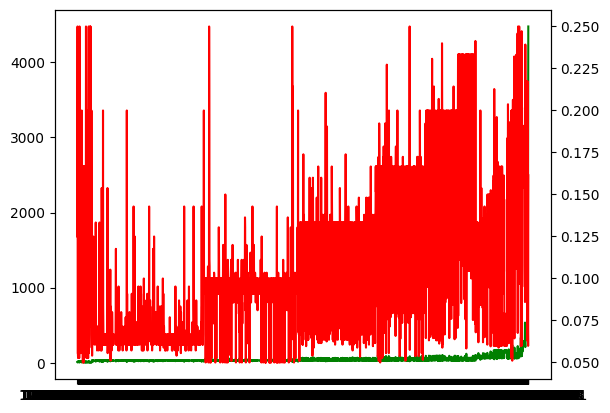

In [15]:
## this is implement for plot simple password [123456] count plot
import matplotlib.pyplot as plt

def plot_appear_per_ip_twinx():
    
    data_count, text_count = load_data("dataset/extracted/ip-count.log")
    ip_map = {}
    for i in range(len(text_count)):
        ip_map[text_count[i]] = data_count[i]

    data_specific, text_specific = load_data("dataset/extracted/ch2/123456-ip-count.log")

    x = []
    y1 = [] # appearance count
    y2 = [] # appear proportion
    for i in range(len(text_specific)):
        ip = text_specific[i]
        total = ip_map[ip]

        prop = data_specific[i]/total
        if prop < 0.05 or prop > 0.25:
            continue
        x.append(ip)
        y1.append(total)
        y2.append(prop)

    print(y1)
    print(y2)

    ax1 = plt.gca()
    ax1.plot(x, y1, c='g', label='222')
    ax2 = plt.twinx()
    ax2.plot(x, y2, c='r', label='111')

    # plt.title("Simple Password [123456] Appearance", fontsize=16)

    
plot_appear_per_ip_twinx()
plt.show()